In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
response=requests.get("https://www.sofascore.com/football/match/liverpool-crystal-palace/hsU#id:14025190,tab:statistics")

In [4]:
response.status_code

200

In [5]:
soup=BeautifulSoup(response.text,"html.parser")

In [6]:
soup.select('g[cursor="pointer"]')

[]

In [7]:
response.status_code

200

In [25]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/liverpool-crystal-palace/hsU',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = 'https://www.sofascore.com/api/v1/event/14025190/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [26]:
shots=response.json()

In [27]:
df=pd.json_normalize(shots["shotmap"])

In [28]:
df

,isHome,shotType,goalType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,...,draw.start.y,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y
0,True,goal,regular,throw-in-set-piece,left-foot,low-centre,0.430239,0.383549,5776679,90,...,7.9,50.1,0,50.1,89.2,NaN,NaN,NaN,NaN,NaN
1,False,goal,regular,regular,right-foot,low-left,0.245264,0.771536,5776590,87,...,8.6,46.4,0,46.4,86.7,NaN,NaN,NaN,NaN,NaN
2,True,save,NaN,assisted,left-foot,low-centre,0.102756,0.044716,5776573,86,...,13.8,50.0,0,50.0,93.7,1.4,50.2,0.0,50.2,1.4
3,True,block,NaN,assisted,right-foot,low-centre,0.027949,0.000000,5776571,86,...,26.3,49.6,0,49.6,81.0,13.8,45.7,0.0,45.7,13.8
4,False,miss,NaN,assisted,left-foot,close-left,0.045894,0.000000,5776558,85,...,18.5,41.5,0,41.5,79.2,NaN,NaN,NaN,NaN,NaN
5,True,miss,NaN,set-piece,right-foot,high,0.020319,0.000000,5776469,80,...,19.8,48.4,0,48.4,9.7,NaN,NaN,NaN,NaN,NaN
6,True,miss,NaN,assisted,head,right,0.138463,0.000000,5776448,79,...,9.1,62.0,0,62.0,84.7,NaN,NaN,NaN,NaN,NaN
7,False,miss,NaN,assisted,left-foot,high-left,0.270574,0.000000,5776403,76,...,8.3,43.9,0,43.9,30.6,NaN,NaN,NaN,NaN,NaN
8,False,block,NaN,regular,right-foot,low-left,0.031675,0.000000,5776400,76,...,12.8,47.9,0,47.9,81.0,6.8,56.7,0.0,56.7,6.8
9,False,miss,NaN,regular,left-foot,left,0.043203,0.000000,5776453,76,...,21.9,37.8,0,37.8,75.0,9.7,40.8,0.0,40.8,9.7


In [29]:
df.columns

Index(['isHome', 'shotType', 'goalType', 'situation', 'bodyPart',
       'goalMouthLocation', 'xg', 'xgot', 'id', 'time', 'addedTime',
       'timeSeconds', 'reversedPeriodTime', 'reversedPeriodTimeSeconds',
       'periodTimeSeconds', 'incidentType', 'player.name', 'player.firstName',
       'player.lastName', 'player.slug', 'player.shortName', 'player.position',
       'player.jerseyNumber', 'player.userCount', 'player.sofascoreId',
       'player.id', 'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.bn',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'draw.start.x', 'draw.start.y', 'draw.end

In [30]:
df=df[["isHome","shotType","goalType","goalMouthLocation","xg","time","player.shortName","player.jerseyNumber","playerCoordinates.x",
       "playerCoordinates.y","goalMouthCoordinates.x","goalMouthCoordinates.y","blockCoordinates.x","blockCoordinates.y"]]

In [31]:
df

,isHome,shotType,goalType,goalMouthLocation,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,True,goal,regular,low-centre,0.430239,90,E. Nketiah,9,7.9,43.2,0,49.9,NaN,NaN
1,False,goal,regular,low-left,0.245264,87,F. Chiesa,14,8.6,44.4,0,53.6,NaN,NaN
2,True,save,NaN,low-centre,0.102756,86,D. Muñoz,2,13.8,56.9,0,50.0,1.4,50.2
3,True,block,NaN,low-centre,0.027949,86,J. Lerma,8,26.3,42.1,0,50.4,13.8,45.7
4,False,miss,NaN,close-left,0.045894,85,F. Chiesa,14,18.5,51.1,0,58.5,NaN,NaN
5,True,miss,NaN,high,0.020319,80,J. Lerma,8,19.8,61.7,0,51.6,NaN,NaN
6,True,miss,NaN,right,0.138463,79,E. Nketiah,9,9.1,49.7,0,38.0,NaN,NaN
7,False,miss,NaN,high-left,0.270574,76,M. Salah,11,8.3,54.2,0,56.1,NaN,NaN
8,False,block,NaN,low-left,0.031675,76,D. Szoboszlai,8,12.8,64.4,0,52.1,6.8,56.7
9,False,miss,NaN,left,0.043203,76,C. Jones,17,21.9,43.4,0,62.2,9.7,40.8


In [32]:
df=df.fillna(value=0)

In [33]:
df

,isHome,shotType,goalType,goalMouthLocation,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,True,goal,regular,low-centre,0.430239,90,E. Nketiah,9,7.9,43.2,0,49.9,0.0,0.0
1,False,goal,regular,low-left,0.245264,87,F. Chiesa,14,8.6,44.4,0,53.6,0.0,0.0
2,True,save,0,low-centre,0.102756,86,D. Muñoz,2,13.8,56.9,0,50.0,1.4,50.2
3,True,block,0,low-centre,0.027949,86,J. Lerma,8,26.3,42.1,0,50.4,13.8,45.7
4,False,miss,0,close-left,0.045894,85,F. Chiesa,14,18.5,51.1,0,58.5,0.0,0.0
5,True,miss,0,high,0.020319,80,J. Lerma,8,19.8,61.7,0,51.6,0.0,0.0
6,True,miss,0,right,0.138463,79,E. Nketiah,9,9.1,49.7,0,38.0,0.0,0.0
7,False,miss,0,high-left,0.270574,76,M. Salah,11,8.3,54.2,0,56.1,0.0,0.0
8,False,block,0,low-left,0.031675,76,D. Szoboszlai,8,12.8,64.4,0,52.1,6.8,56.7
9,False,miss,0,left,0.043203,76,C. Jones,17,21.9,43.4,0,62.2,9.7,40.8


In [34]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

In [35]:
for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==False):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
    if (df["isHome"][x]==True):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_29448\1948113594.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_29448

In [36]:
df

,isHome,shotType,goalType,goalMouthLocation,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,True,goal,regular,low-centre,0.430239,90,E. Nketiah,9,9.48,45.44,0.0,39.92,0.0,0.0
1,False,goal,regular,low-left,0.245264,87,F. Chiesa,14,10.32,44.48,0.0,42.88,0.0,0.0
2,True,save,0,low-centre,0.102756,86,D. Muñoz,2,16.56,34.48,0.0,40.00,1.4,50.2
3,True,block,0,low-centre,0.027949,86,J. Lerma,8,31.56,46.32,0.0,40.32,13.8,45.7
4,False,miss,0,close-left,0.045894,85,F. Chiesa,14,22.20,39.12,0.0,46.80,0.0,0.0
5,True,miss,0,high,0.020319,80,J. Lerma,8,23.76,30.64,0.0,41.28,0.0,0.0
6,True,miss,0,right,0.138463,79,E. Nketiah,9,10.92,40.24,0.0,30.40,0.0,0.0
7,False,miss,0,high-left,0.270574,76,M. Salah,11,9.96,36.64,0.0,44.88,0.0,0.0
8,False,block,0,low-left,0.031675,76,D. Szoboszlai,8,15.36,28.48,0.0,41.68,6.8,56.7
9,False,miss,0,left,0.043203,76,C. Jones,17,26.28,45.28,0.0,49.76,9.7,40.8


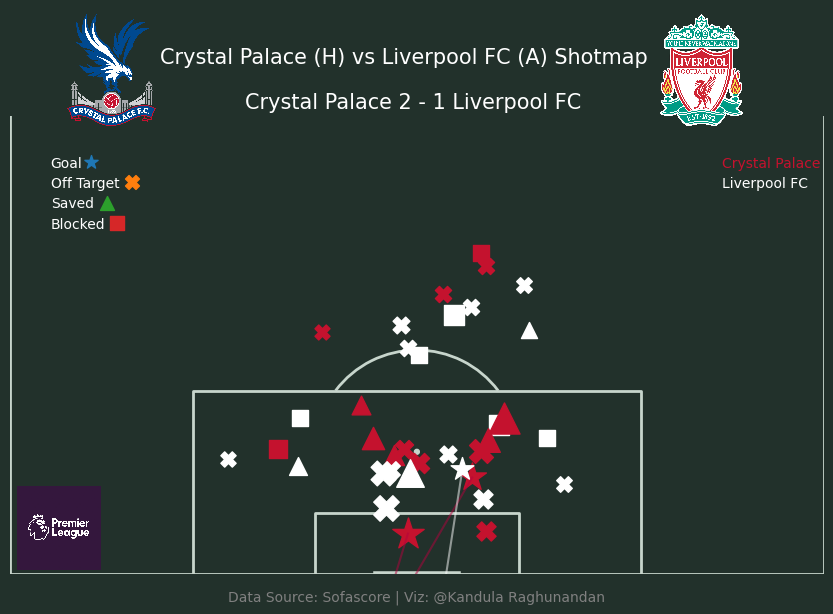

In [84]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C4122E",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C4122E",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C4122E",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C4122E",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#B3023D",alpha=0.5)
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#FFFFFF",alpha=0.5)

plt.title("Crystal Palace 2 - 1 Liverpool FC ",color="white",size=15)
plt.suptitle("Crystal Palace (H) vs Liverpool FC (A) Shotmap", fontsize=15, color="white", y=0.92)
ax.text(4,40,"Goal",c="white")
ax.scatter(8,40.5,marker="*",s=100)
ax.text(4,38,"Off Target",color="white")
ax.scatter(12,38.5,marker="X",s=100)
ax.text(4,36,"Saved",color="white")
ax.scatter(9.5,36.5,marker="^",s=100)
ax.text(4,34,"Blocked",color="white")
ax.scatter(10.5,34.5,marker="s",s=100)

ax.text(70,40,"Crystal Palace",c="#C4122E")
ax.text(70,38,"Liverpool FC",c="#FFFFFF")


plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)
#Logos
home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Crystal Palace.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Liverpool.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Prem Logo.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.04, xy=(0.125, 1.1))
add_logo(ax, away_logo, zoom=0.04, xy=(0.85, 1.1))
add_logo(ax,league_logo,zoom=0.03, xy=(0.06,0.1))

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Palace_vs_Liverpool_2025.png")

In [85]:
df=df.sort_values("time").reset_index()
df

,index,isHome,shotType,goalType,goalMouthLocation,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,35,True,goal,regular,low-right,0.576983,9,I. Sarr,7,3.96,39.12,0.0,37.92,0.0,0.0
1,34,True,save,0,low-left,0.236835,11,Y. Pino,10,13.20,46.96,0.0,42.40,1.4,50.5
2,31,False,miss,0,high-right,0.031561,19,M. Kerkez,6,8.88,54.48,0.0,25.52,0.0,0.0
3,33,False,block,0,low-centre,0.133711,19,M. Salah,11,25.44,43.68,0.0,41.20,13.2,46.6
4,32,False,save,0,low-left,0.042263,19,R. Gravenberch,38,24.00,51.04,0.0,43.04,1.1,50.2
5,29,True,miss,0,high,0.087241,22,D. Muñoz,2,12.24,38.72,0.0,40.72,0.0,0.0
6,30,True,save,0,low-centre,0.196973,22,D. Muñoz,2,13.32,35.68,0.0,41.20,1.5,50.9
7,27,True,miss,0,left,0.042800,23,A. Wharton,20,30.24,46.80,0.0,70.16,0.0,0.0
8,28,True,save,0,low-centre,0.501575,23,J. Mateta,14,15.36,48.56,0.0,40.80,7.6,43.0
9,26,False,miss,0,right,0.025251,28,A. Isak,9,11.28,21.44,0.0,31.76,0.0,0.0


In [86]:
a_xG=[0]
h_xG=[0]
a_min=[0]
h_min=[0]

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        h_xG.append(df["xg"][x])
        h_min.append(df["time"][x])
    if (df["isHome"][x]==False):
        a_xG.append(df["xg"][x])
        a_min.append(df["time"][x])

In [87]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum=nums_cumulative_sum(a_xG)
h_cum=nums_cumulative_sum(h_xG)

In [88]:
h_cum

[0,
 np.float64(0.57698315382004),
 np.float64(0.8138178139925),
 np.float64(0.901058346033096),
 np.float64(1.098031744360926),
 np.float64(1.140832141041758),
 np.float64(1.642407014966018),
 np.float64(1.7543103620410079),
 np.float64(1.8168212696910018),
 np.float64(2.059497706592092),
 np.float64(2.103908907622108),
 np.float64(2.2390483282506577),
 np.float64(2.3775113783776876),
 np.float64(2.3978299200534936),
 np.float64(2.4257790148258325),
 np.float64(2.5285346731543625),
 np.float64(2.9587738439440825)]

In [89]:
a_cum

[0,
 np.float64(0.031561218202114),
 np.float64(0.165272258222104),
 np.float64(0.207534801214934),
 np.float64(0.232786033302546),
 np.float64(0.307035822421313),
 np.float64(0.389047484844924),
 np.float64(0.498939182609324),
 np.float64(0.540730655193333),
 np.float64(0.5979330651462119),
 np.float64(0.9654516093432919),
 np.float64(0.9983523711562169),
 np.float64(1.0343322046101109),
 np.float64(1.1449203230440608),
 np.float64(1.2045087292790408),
 np.float64(1.5002371743321408),
 np.float64(1.5319123454391947),
 np.float64(1.8024864979088346),
 np.float64(1.8456891737878367),
 np.float64(1.8915835432708308),
 np.float64(2.136847119778401)]

In [90]:
a_total=round(a_cum[-1],2)
h_total=round(h_cum[-1],2)

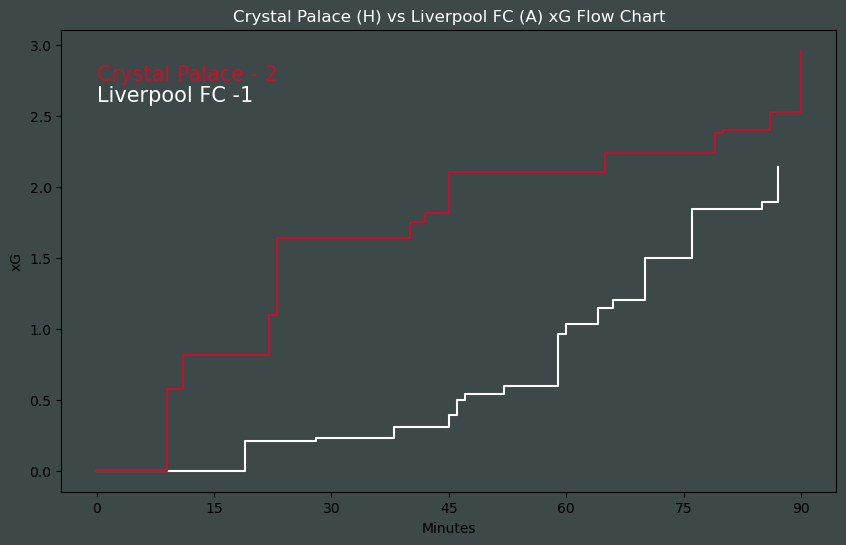

In [113]:
fig,ax=plt.subplots(figsize=(10,6))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minutes")
plt.ylabel("xG")

ax.step(x=a_min,y=a_cum,where="post",color="#FFFFFF")
ax.step(x=h_min,y=h_cum,where="post",color="#C4122E")

ax.text(0,2.75,"Crystal Palace - 2", color="#C4122E",size=15)
ax.text(0,2.6,"Liverpool FC -1", color="#FFFFFF",size=15)

plt.title("Crystal Palace (H) vs Liverpool FC (A) xG Flow Chart",color="white")
plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Palace_vs_Liverpool_2025_xG.png")